HW1 AI in data analys Smolkina

# Exploratory data analysis (EDA)



In [16]:
import pandas as pd

# load the dataset (df stands for the DataFrame)
df = pd.read_csv("C:/Users/j.smolkina/OneDrive - CRITEO/Desktop/MIPT/Юдин/Life_Expectancy_Data.csv")

In [17]:
# print the 'shape' of the matrix
print(f"Rows x columns: {df.shape}")

Rows x columns: (2461, 23)


In [18]:
# print first 4 lines
df.head(n=4)

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8


There are 23 features and 2461 entries in total. Our target variable is called `Life_Expectancy_Data.csv`.


## Preprocessing

In [21]:
# Dictionary(mapping), old name -> new name
mapping = {
  'Life_expectancy ': 'Life expectancy',
  'Adult_Mortality': 'Adult mortality',
  'infant_deaths': 'Infant deaths',
  'percentage_expenditure': 'Percentage expenditure',
  'Hepatitis_B': 'Hepatitis B', 
  'Measles ': 'Measles', 
  ' BMI ': 'BMI', 
  'under_five_deaths ': 'Under-five deaths',
  'Total_expenditure': 'Total expenditure', 
  'Diphtheria ': 'Diphtheria', 
  ' HIV/AIDS': 'HIV/AIDS',
  ' thinness  1-19 years': 'Thinnes (1-19 years)', 
  ' thinness 5-9 years': 'Thinnes (5-9 years)',
  'Income_composition_of_resources': 'Income composition of resources'
}
# Rename columns
df.rename(columns=mapping, inplace=True) 
# without inplace
# df = df.rename(columns=mapping)

In [22]:
# Check the header
df.head(n=3)

,Country,Continent,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9


Let's check if there are any missing values.

In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2461 non-null   object 
 1   Continent                        2461 non-null   object 
 2   Year                             2461 non-null   int64  
 3   Status                           2461 non-null   object 
 4   Life expectancy                  2461 non-null   float64
 5   Adult mortality                  2461 non-null   int64  
 6   Infant deaths                    2461 non-null   int64  
 7   Alcohol                          2461 non-null   float64
 8   Percentage expenditure           2461 non-null   float64
 9   Hepatitis B                      1997 non-null   float64
 10  Measles                          2461 non-null   int64  
 11  BMI                              2461 non-null   float64
 12  Under-five deaths   

Unfortunately, the dataset is not complete — several columns have missing values. 

In [24]:
# Calculate total number of nulls for each column:

isnull = df.isnull()

isnull = isnull.sum()

isnull[isnull > 0]

Hepatitis B                        464
Polio                                8
Total expenditure                  152
Income composition of resources      3
Schooling                            3
dtype: int64

Drop null rows(records)

In [25]:
print(f"Rows before: {df.shape[0]}")

isnull = df.isnull()
isnull = isnull.any(axis=1)
print(f"\tWill be dropped {isnull.sum()} rows")
notnull = ~isnull
df = df[notnull]

print(f"Rows after: {df.shape[0]}")

Rows before: 2461
	Will be dropped 608 rows
Rows after: 1853


In [26]:
df.dtypes

Country                             object
Continent                           object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult mortality                      int64
Infant deaths                        int64
Alcohol                            float64
Percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
Under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                          object
HIV/AIDS                           float64
GDP                                float64
Population                          object
Thinnes (1-19 years)               float64
Thinnes (5-9 years)                float64
Income composition of resources    float64
Schooling                          float64
dtype: obje

In [27]:
print("Unique continents:", df['Continent'].unique())
df['Continent'] = df['Continent'].astype('category')
print(f"New continent data type: {df['Continent'].dtype}")

Unique continents: ['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Australia'
 'Oceania' 'Asia/Europe']
New continent data type: category


In [28]:
# Similarly, cast Country and Status to categorical
print('Status types:', df['Status'].unique())
df['Status'] = df['Status'].astype('category')

df['Country'] = df['Country'].astype('category')

Status types: ['Developing' 'Developed']


In [29]:
# property that lists all the available categories for the column:
print("Countries: ", df['Country'].cat.categories)

Countries:  Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Zambia', 'Zimbabwe'],
      dtype='object', length=147)


In [30]:
# Skip records with unknown population
mask = df['Population'] != 'Unknown'
df = df[mask]
df['Population'] = df['Population'].astype(float)

In [31]:
df['Diphtheria'] = df['Diphtheria'].astype(int)

Make sure we no longer have `object` columns:

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2460
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          1649 non-null   category
 1   Continent                        1649 non-null   category
 2   Year                             1649 non-null   int64   
 3   Status                           1649 non-null   category
 4   Life expectancy                  1649 non-null   float64 
 5   Adult mortality                  1649 non-null   int64   
 6   Infant deaths                    1649 non-null   int64   
 7   Alcohol                          1649 non-null   float64 
 8   Percentage expenditure           1649 non-null   float64 
 9   Hepatitis B                      1649 non-null   float64 
 10  Measles                          1649 non-null   int64   
 11  BMI                              1649 non-null   float64 
 12  Under-

Desription of data

|Field|Description|
|---:|:---|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|Percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|Under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|Thinness (1-19 years)|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|Thinness (5-9 years)|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|

## Visualization



![boxplots](https://miro.medium.com/max/1838/1*2c21SkzJMf3frPXPAR_gZA.png)


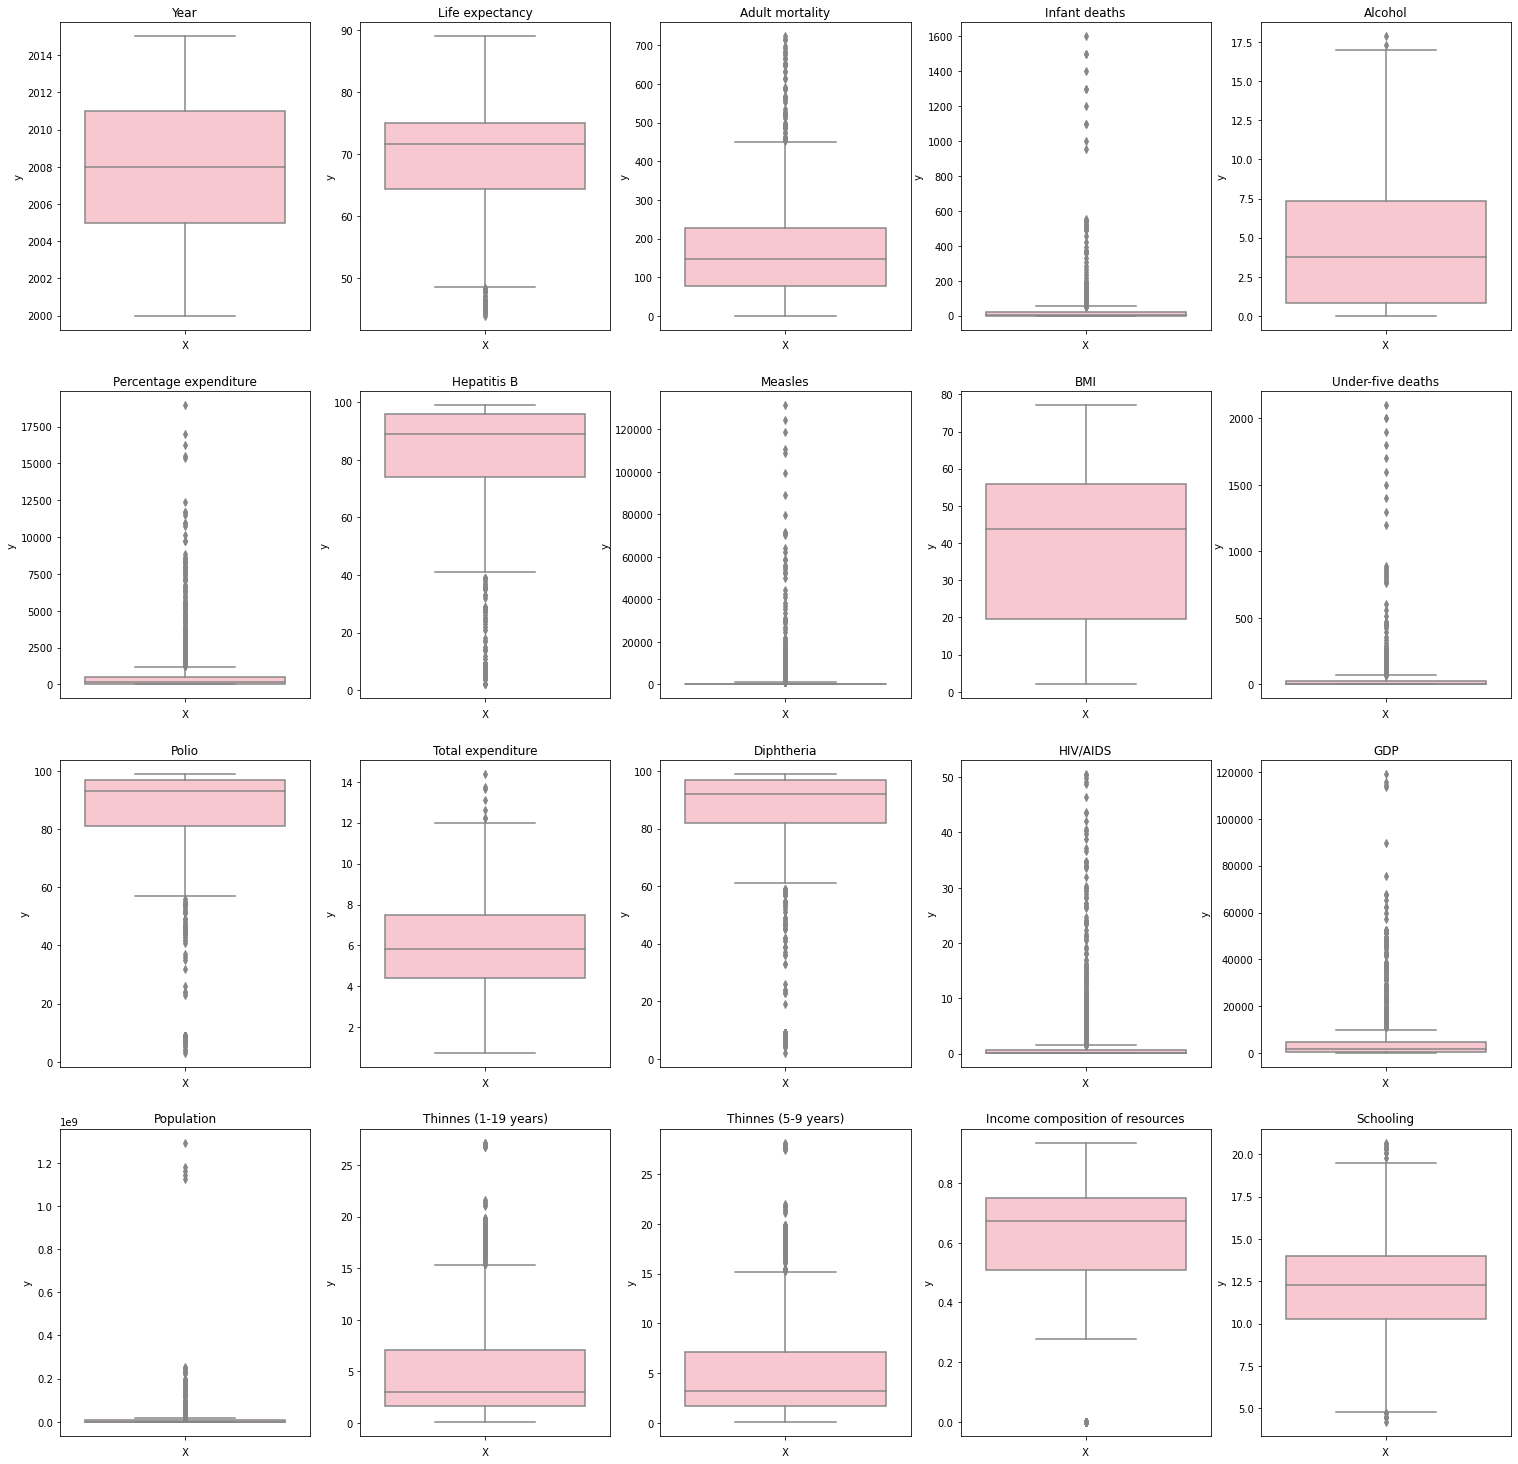

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get numeric columns only
numeric = list(df.select_dtypes(include=np.number).columns)

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(26, 14))
#axes is a 4x5 matrix, ravel it to a flat array with 20 elements
axes = axes.ravel()

assert len(numeric) == len(axes)

# Plot boxplot for each numeric column
for col, ax in zip(numeric, axes):
  sns.boxplot(y = df[col], ax=ax,color='pink')
  #sns.violinplot(y = df[col], ax=ax)
  ax.set_title(col)
  ax.set(xlabel=' X ', ylabel=' y ')

In [36]:
# Perform `describe` only for numeric columns
df[numeric].describe()

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


Create a histogram for each column using the built-in pandas method:

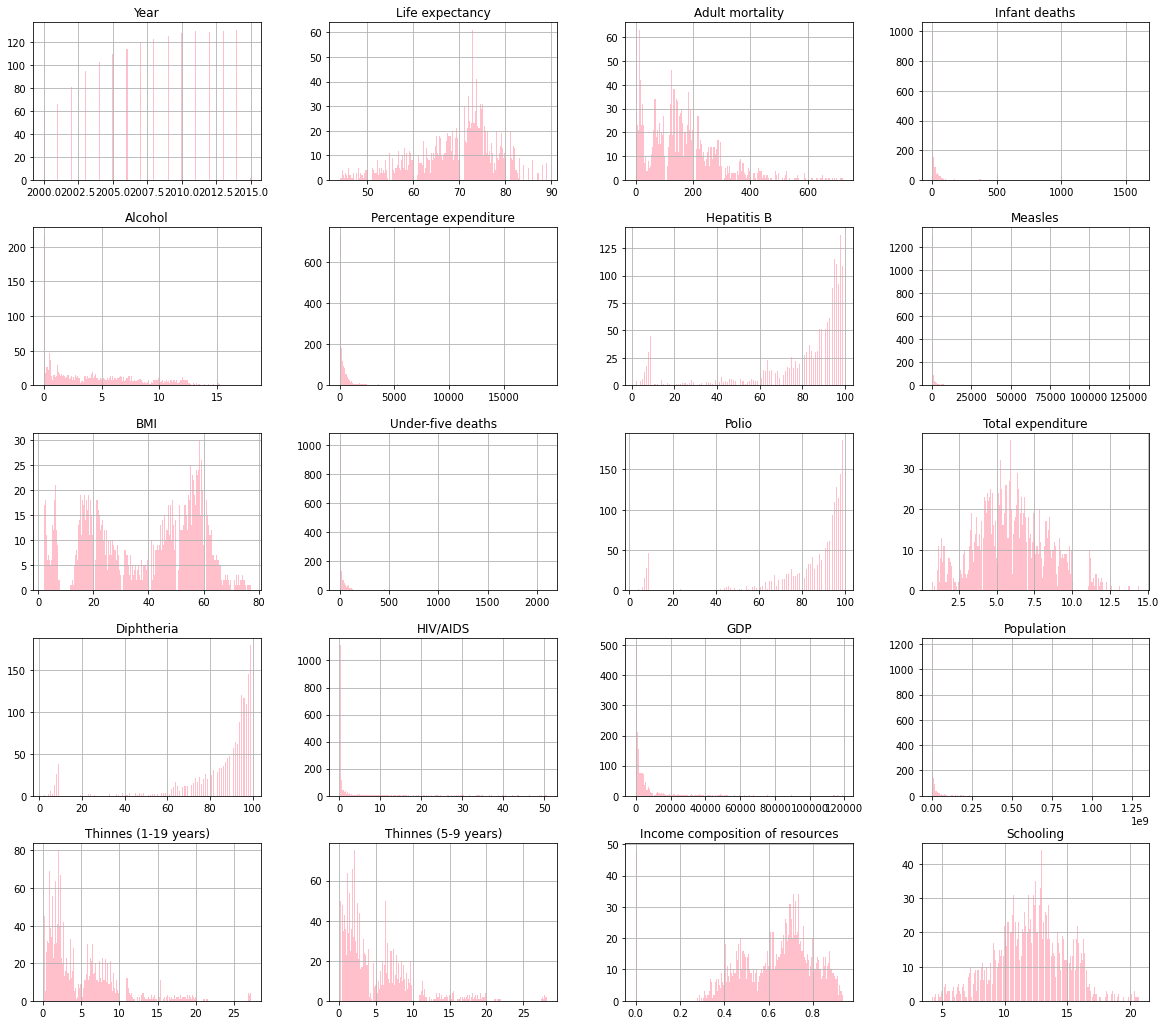

In [40]:
_ = df[numeric].hist(figsize=(20, 18), bins=200,color='pink')

 "trim" the data and keep only records where values in each column are within [$\alpha$, 1-$\alpha$] percentiles.

In [41]:
print(f"Records before: {len(df)}")

low, high = 0.01, 0.99
quantiles = df[numeric].quantile([low, high])
quantiles.drop(columns=['Year'], inplace=True)
for col in quantiles.columns:
  low, high = quantiles[col].tolist()
  mask = (df[col] >= low) & (df[col] <= high)
  df = df[mask]

print(f"Records after: {len(df)}")


Records before: 1649
Records after: 1355


In [42]:
quantiles

,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling
0.01,46.0,3.48,0.00,0.0100,0.871529,6.0,0.0,2.348,0.0,7.0,1.2000,7.0,0.1,18.764196,3.888400e+02,0.100,0.100,0.00000,5.248
0.99,86.0,614.04,517.16,14.1524,8600.531285,99.0,54807.0,72.752,809.8,99.0,11.6856,99.0,34.6,52021.810764,1.836554e+08,19.852,20.524,0.91152,18.600


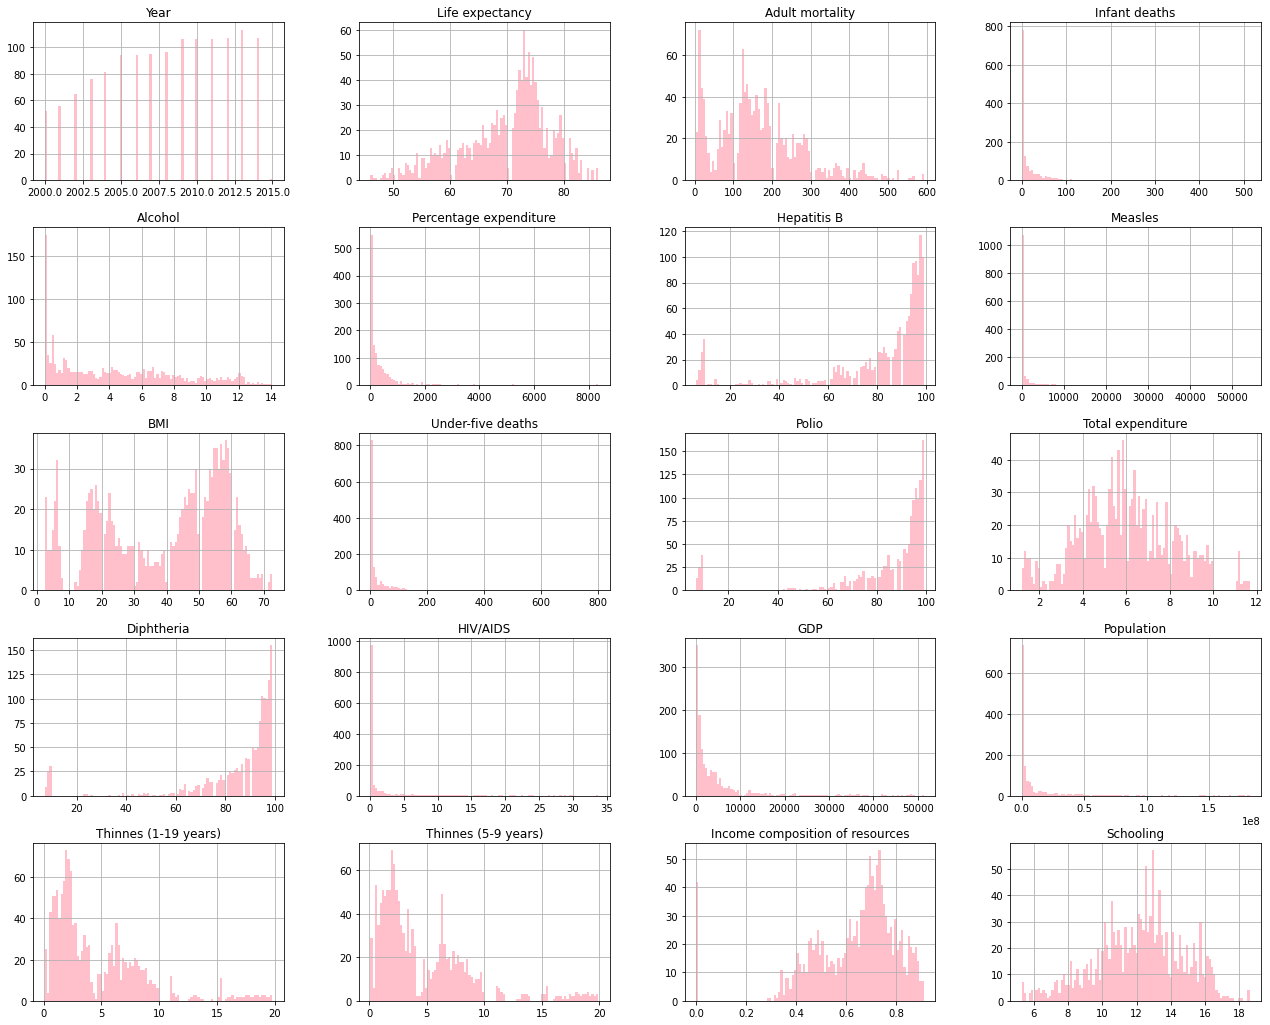

In [43]:
_ = df[numeric].hist(figsize=(22, 18), bins=100,color='pink')

So, I dropped about 300 records, but there is still a suspicious peak at '0' for the income composition of resources 

In [44]:
print(f"Recods before: {len(df)}")
df = df[df['Income composition of resources'] > 1e-6]
print(f"Recods after: {len(df)}")

Recods before: 1355
Recods after: 1313


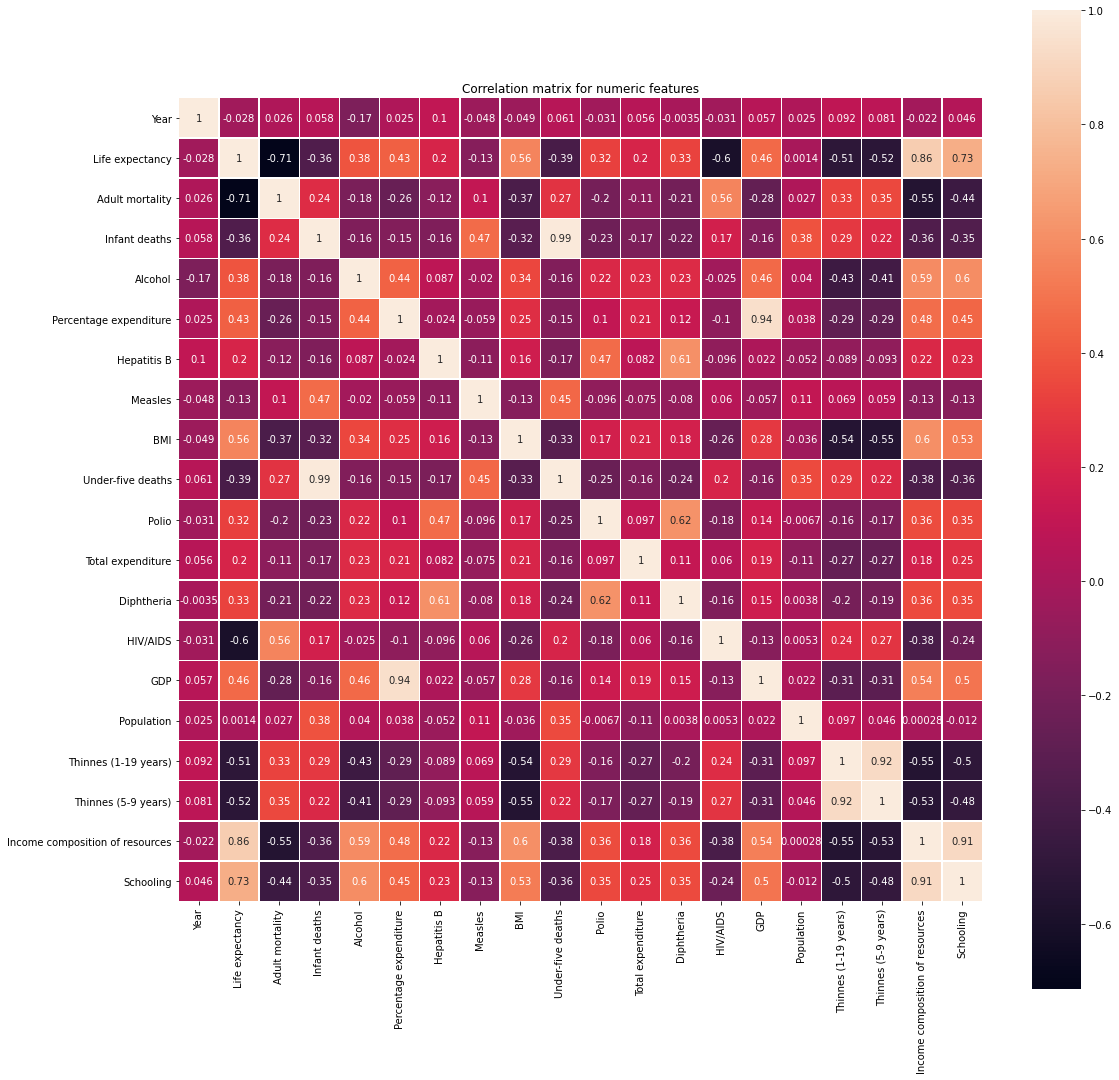

In [45]:
correlations = df[numeric].corr()

plt.figure(figsize=(18,18))
sns.heatmap(correlations, square=True, annot=True, linewidths=0.3)
plt.title("Correlation matrix for numeric features")
plt.show()

 relationship between durability and each feature:

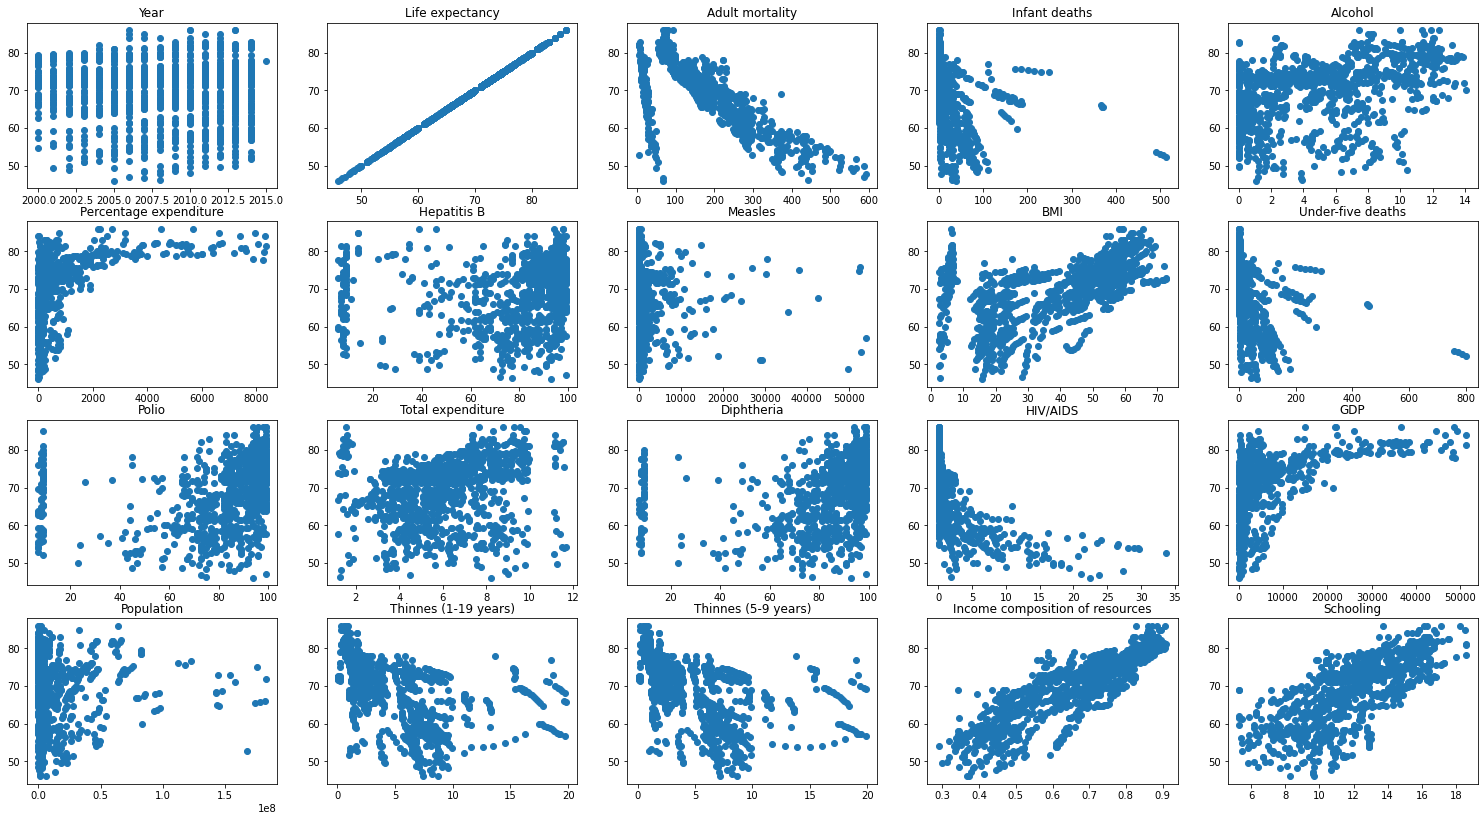

In [51]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(26, 14))
axes = axes.ravel()

for ax, col in zip(axes, numeric):
  ax.scatter(df[col], df['Life expectancy'])
  ax.set_title(col)

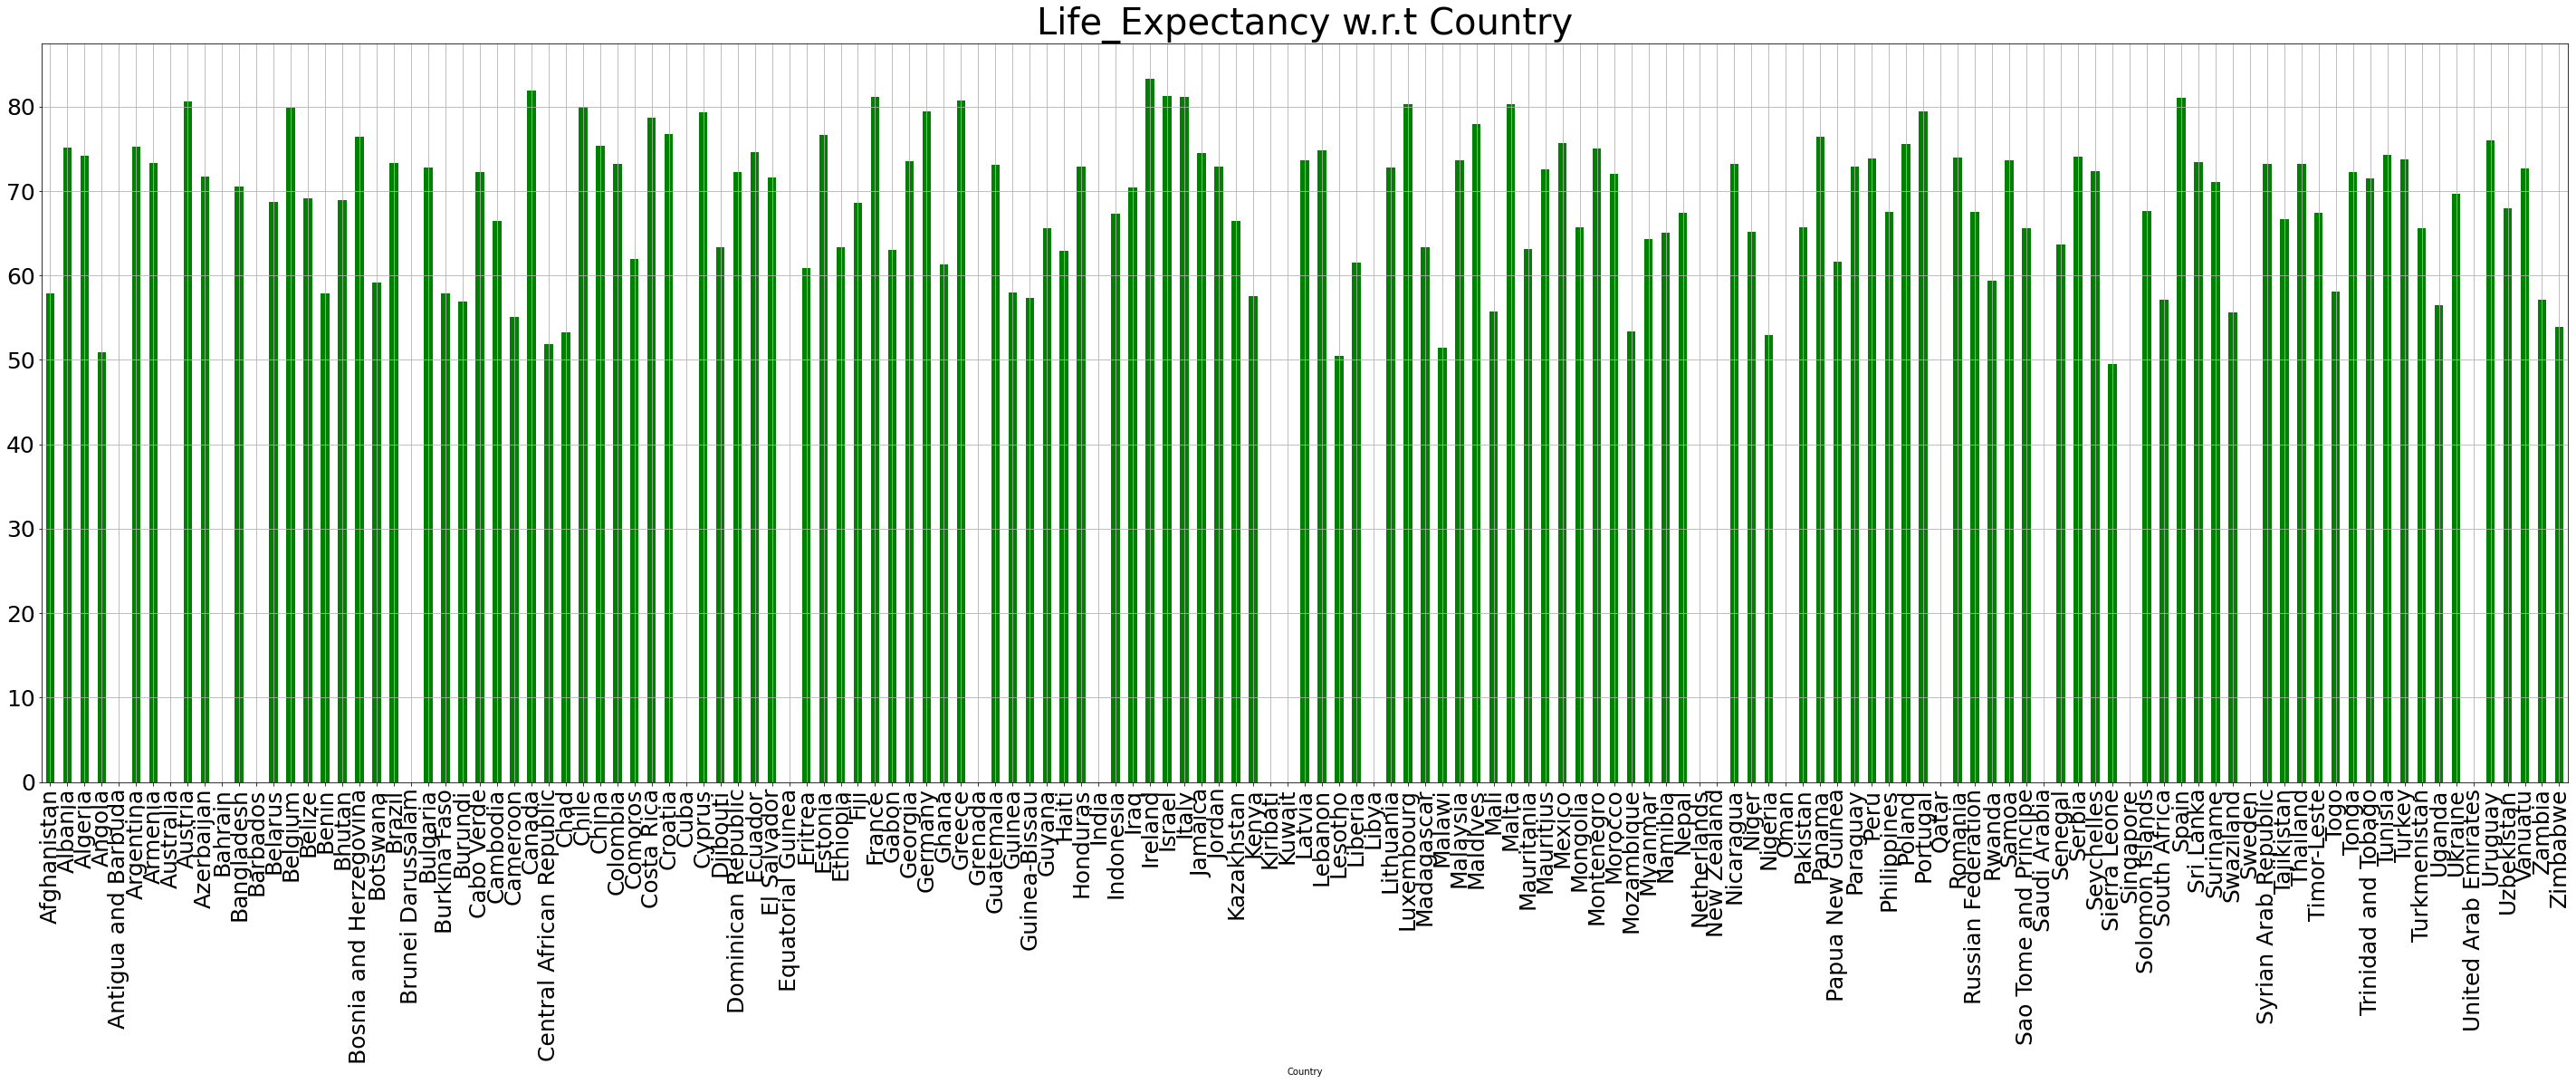

In [52]:
countries = df.groupby('Country')['Life expectancy'].mean()

ax = countries.plot(kind='bar', figsize=(50,15), fontsize=25,color='green')
ax.set_title("Life_Expectancy w.r.t Country",fontsize=40)
ax.grid()

remove these "empty" categories from the general list:
# select only categorical columns

In [53]:
categorical = list(df.select_dtypes('category').columns)

for col in categorical:
  df[col].cat.remove_unused_categories()

# ML-specific preprocessing

## Dummy variables (one-hot encoding)

Overall, we have 20 columns with 1 target variable.

Among them, i will drop 'Country', 'Continent' and 'Year' features. 

In [54]:
columns = numeric + categorical
for x in "Country", "Continent", "Year":
  columns.remove(x)
df = df[columns]

In [55]:
ddf = pd.get_dummies(df, columns=['Status'])

In [56]:
ddf

,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling,Status_Developed,Status_Developing
1,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,59.9,268,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,59.5,272,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,59.2,275,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,58.8,279,74,0.01,79.679367,66.0,1989,16.7,102,66.0,...,66,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,56.6,429,26,6.09,92.602336,97.0,0,3.3,39,95.0,...,95,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8,0,1
2449,54.9,464,28,6.00,63.750530,94.0,0,29.9,42,93.0,...,93,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1,0,1
2450,52.4,527,29,5.21,53.308581,9.0,9696,29.4,44,89.0,...,89,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0,0,1
2451,50.0,587,30,4.64,1.040021,73.0,853,29.0,45,69.0,...,73,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9,0,1


## Train/test split

In [57]:
from sklearn.model_selection import train_test_split

Y = ddf.pop("Life expectancy")
Y = Y.values
X = ddf.values

print("Before:")
print(f"\tX: {X.shape}; Y: {Y.shape}")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

print("Train:")
print(f"\tX: {X_train.shape}; Y: {Y_train.shape}")
print("Test:")
print(f"\tX: {X_test.shape}; Y: {Y_test.shape}")


Before:
	X: (1313, 20); Y: (1313,)
Train:
	X: (919, 20); Y: (919,)
Test:
	X: (394, 20); Y: (394,)


## Utilities

functions for model evaluation on test data.

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

In [62]:
def report_quality(model, X_test, Y_test):
  Y_pred = model.predict(X_test)
  print(f"R^2:\t{r2_score(Y_test, Y_pred)}")
  print(f"RMSE:\t{sqrt(mean_squared_error(Y_test, Y_pred))}")
  print(f"MAE:\t{mean_absolute_error(Y_test, Y_pred)}")
  return Y_pred

# Linear models

## Linear regression

In [63]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=True)
lm.fit(X_train, Y_train)
Y_pred = report_quality(lm, X_test, Y_test)

R^2:	0.8608379335021215
RMSE:	2.915356306813303
MAE:	2.262052550084707


[Text(0.5, 0, 'observed'),
 Text(0, 0.5, 'predicted'),
 Text(0.5, 1.0, 'Observed vs predicted')]

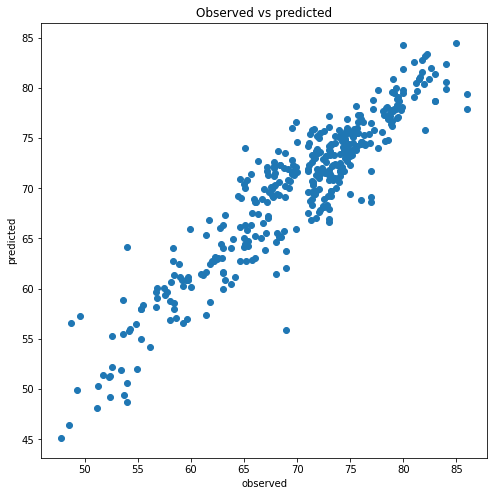

In [67]:
plt.figure(figsize=(8,8))
plt.scatter(Y_test, Y_pred)
plt.gca().set(xlabel='observed', ylabel='predicted', title='Observed vs predicted')

In [68]:
# Model coefficients
lm.coef_

array([-1.40112706e-02,  7.55413119e-02, -1.76136359e-01,  8.26397117e-04,
       -1.14527144e-03,  9.68391795e-06,  1.29996724e-02, -5.86524747e-02,
       -4.74762622e-04,  2.73448156e-01,  5.85868181e-03, -4.29351882e-01,
       -8.69508487e-05,  9.86354095e-09,  1.32200826e-01, -1.78815785e-01,
        4.23287660e+01, -3.43391334e-01,  1.68769750e-01, -1.68769750e-01])

In [69]:
assert len(ddf.columns) == len(lm.coef_)
#looj for powerful fwatures
maxposind = lm.coef_.argmax()
print("Highest positive contribution:")
print(f"\tColumn: {ddf.columns[maxposind]}")
print(f"\tWeight: {lm.coef_[maxposind]}")

maxnegind = (-lm.coef_).argmax()
print("Highest negative contribution:")
print(f"\tColumn: {ddf.columns[maxnegind]}")
print(f"\tWeight: {lm.coef_[maxnegind]}")

Highest positive contribution:
	Column: Income composition of resources
	Weight: 42.32876603909106
Highest negative contribution:
	Column: HIV/AIDS
	Weight: -0.4293518817386386


## Lasso

In [70]:
from sklearn.linear_model import Lasso

lasso = Lasso(normalize=True)
lasso.fit(X_train, Y_train)
_ = report_quality(lasso, X_test, Y_test)

R^2:	-0.00042707591962942715
RMSE:	7.816708643617462
MAE:	6.265907546825894


In [71]:
lasso = Lasso(normalize=True, alpha=1e-2)
lasso.fit(X_train, Y_train)
_ = report_quality(lasso, X_test, Y_test)

R^2:	0.8400043396208193
RMSE:	3.1259736124469475
MAE:	2.4317729558419603


Text(0.5, 1.0, 'Lasso coefficients as a function of the regularization')

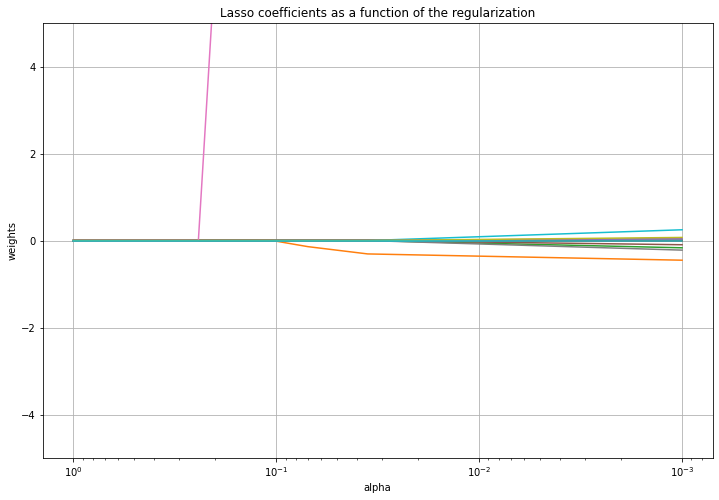

In [72]:
alphas = np.linspace(1e-3, 1, 30)
model = Lasso(normalize=True)

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, Y_train)
    coefs.append(model.coef_)

plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_xlabel('alpha')
ax.set_ylabel('weights')
ax.set_ylim(-5, 5)
ax.grid()
ax.set_title('Lasso coefficients as a function of the regularization')

# Cross-validation

In [73]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression(normalize=True)

scores = cross_val_score(lm, X_train, Y_train, cv=10)
scores

array([0.93164508, 0.87243352, 0.88291846, 0.89805203, 0.84034177,
       0.85452287, 0.89887967, 0.86837247, 0.86737622, 0.88199546])

In [74]:
print(f"R^2: {scores.mean():.3f}")

R^2: 0.880


# Grid search

i use cross-validation to measure average performance of a particular model.

Model with best hyperparameters is returned.


In [75]:
from sklearn.model_selection import GridSearchCV

alphas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

model = Lasso(normalize=True, max_iter=2000)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv=5)
grid.fit(X_train, Y_train)

print("Best params:", grid.best_params_)
print("Best cross validaton score", grid.best_score_)

Best params: {'alpha': 0.0001}
Best cross validaton score 0.8798817015074631


In [76]:
lasso = Lasso(alpha=0.0001, normalize=True, max_iter=2000)
lasso.fit(X_train, Y_train)
lasso.score(X_test, Y_test)

0.8608165449801056